In [1]:
!pip install pprint ipywidgets pandas numpy matplotlib sklearn seaborn xgboost scipy yellowbrick statsmodels pandas_profiling dataprep

Defaulting to user installation because normal site-packages is not writeable


# Gusto

Acute myocardial infarction (“heart attack”) is caused by the formation of a clot in oneof the coronary arteries that supply blood to the heart muscle. 

Acute MI is a major public health problem. Mortality is substantial in the period immediately after the event (and also during the years after surviving the initial  infarction). Some patients die before reaching the  hospital. Patients seen in hospitals are reported to have an average mortality within 30 days around 6–15%, with improvement over time. The risk of 30-day mortality strongly depends on various prognostic factors. In younger patients, risks are much lower than in older patients. Other patient demographics are also important (gender, length, weight), as well as the presence of risk factors (hypertension, diabetes, smoking, family history) and the history of previous cardiovascular events (previous MI, angina, stroke, bypass surgery). Relevant presenting characteristics includethe location of the infarction and the extent of ECG abnormalities. Very important is the acute state of the patients reflected by blood pressure,heart rate, and left ventricular function (e.g., presence of shock).

Aim of this study is to find predictors of 30-days mortality. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from pprint import pprint
from time import sleep

#  load data
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator

from scipy.stats import chi2_contingency

from patsy import dmatrices
import statsmodels.api as sm 

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from scipy.special import expit

from yellowbrick.classifier import ConfusionMatrix, ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas_profiling import ProfileReport
plt.style.use('ggplot')

In [2]:

df = pd.read_csv("./Gusto.csv")

# dummify smk categories
df['eversmk']= (df['smk']!=1).astype(int)
df['currentsmk']=(df['smk']==3).astype(int)
df.drop(["smk"], axis=1, inplace=True)
df.head()

,day30,sex,age,a65,killip,sho,dia,hyp,hrt,ant,...,wei,htn,lip,pan,fam,ste,st4,ttr,eversmk,currentsmk
0,0,0,70.313,1,1,0,0,0,0,1,...,84.0,1,1,0,0,1,0,1,1,1
1,0,0,59.844,0,1,0,1,0,0,1,...,115.0,1,0,0,1,6,1,0,0,0
2,0,0,59.023,0,1,0,0,0,1,0,...,76.0,1,0,0,1,3,0,0,0,0
3,1,1,80.375,1,1,0,0,0,1,0,...,50.0,0,0,0,0,3,0,0,1,1
4,0,0,64.750,0,1,0,0,1,0,0,...,97.4,0,0,1,1,2,0,1,0,0


In [3]:
profile = ProfileReport(df)
profile.to_widgets()

In [4]:
# any null value?
bool(df.isnull().sum().sum())

False

In [5]:
# dropping useless/redundant columns
df.drop(["sho", "a65", "st4"], axis=1, inplace=True)
df.columns

Index(['day30', 'sex', 'age', 'killip', 'dia', 'hyp', 'hrt', 'ant', 'pmi',
       'hei', 'wei', 'htn', 'lip', 'pan', 'fam', 'ste', 'ttr', 'eversmk',
       'currentsmk'],
      dtype='object')

## Question 1

*Build a descriptive table, comparing patients deadversuspatients alive at 30 days. Insert also a column with the total population descriptive statistics.*




''

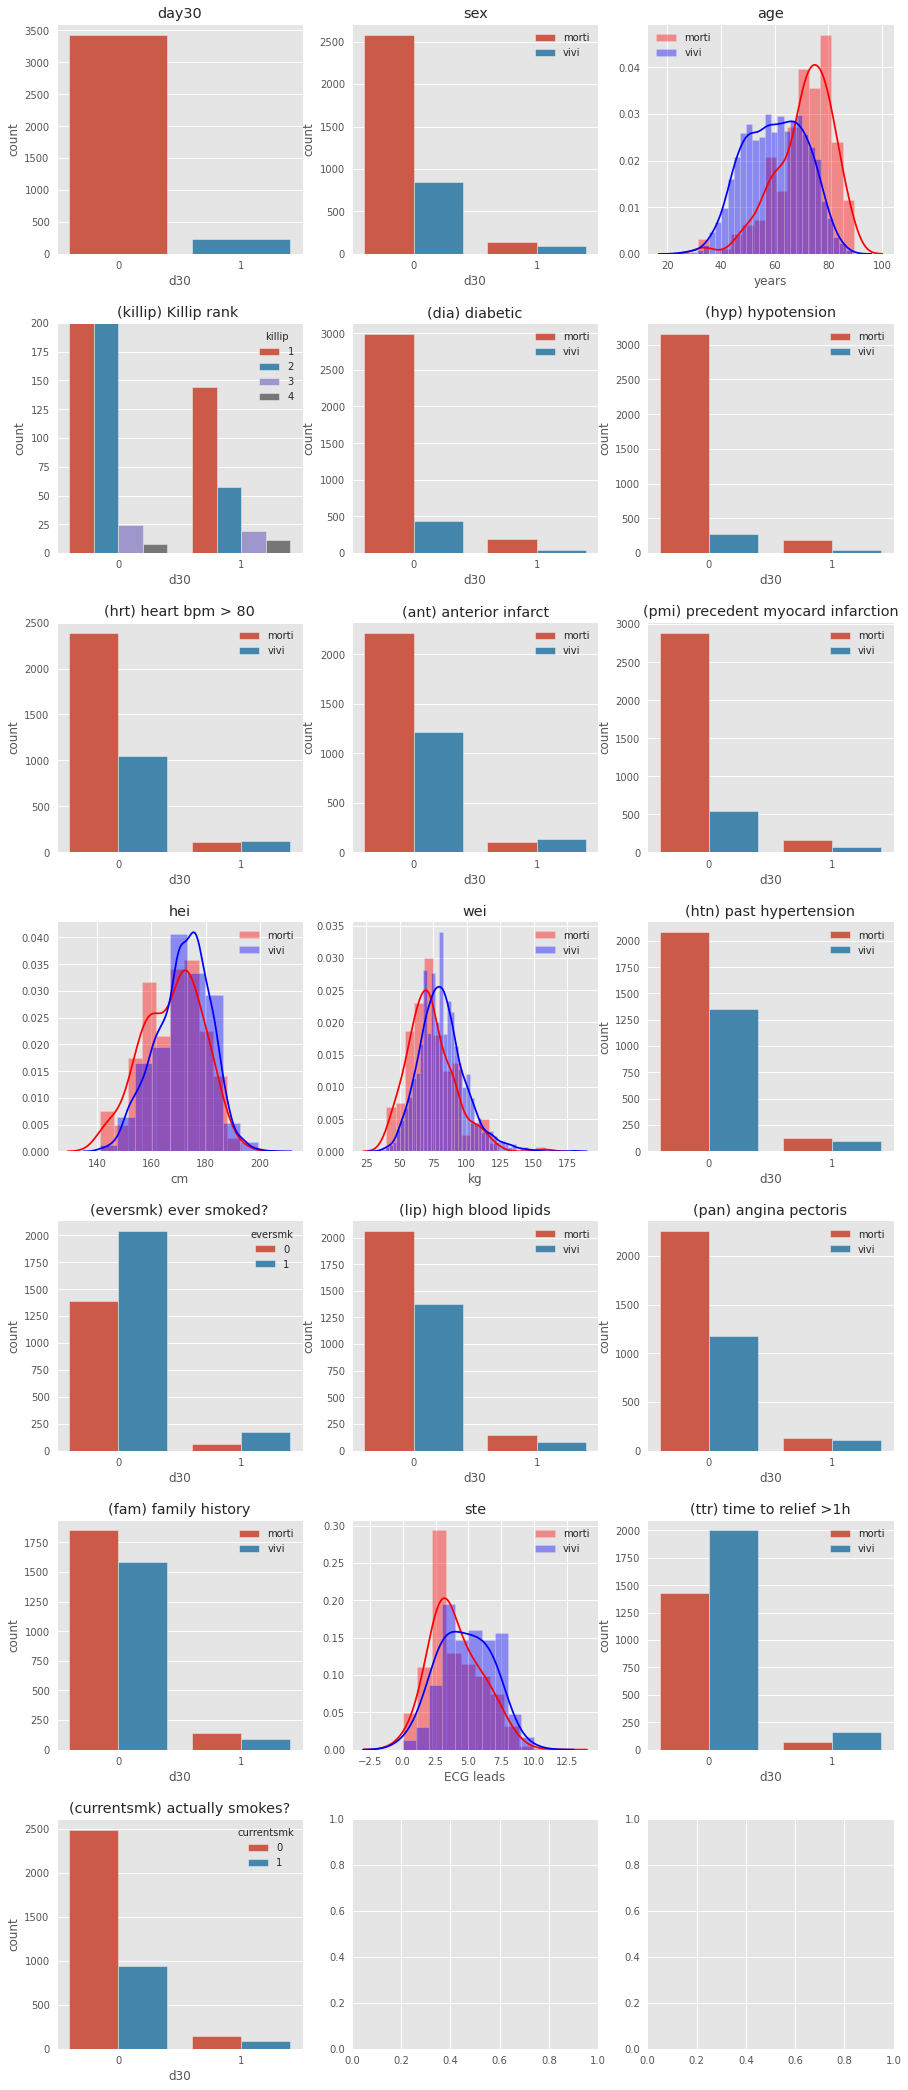

In [6]:
# quick overview
#print(df.describe())


fig, ((a11,a12,a13),
      (a21,a22,a23), 
      (a31,a32,a33),
      (a41,a42,a43),
      (a51,a52,a53),
      (a61,a62,a63),
      (a71,_  ,_  ))= plt.subplots(7,3, figsize=(15,15))


var = "day30"
#a11.hist(df[var], bins=2)
sns.countplot(x='day30',data=df, ax=a11)
a11.set_title(var)
a11.set_xlabel("d30")

sns.countplot(x='day30',hue='sex',data=df, ax=a12)
a12.set_title("sex")
a12.legend(["morti","vivi"])
a12.set_xlabel("d30")

sns.distplot( df.loc[df.day30==1, 'age'] , color="red", label="0", ax=a13)
sns.distplot( df.loc[df.day30==0, 'age'] , color="blue", label="1", ax=a13)
a13.set_title("age")
a13.set_xlabel("years")
a13.legend(["morti","vivi"])

var = "killip"
a21.set_ylim([0,200])
sns.countplot(x='day30',hue='killip',data=df, ax=a21)
a21.set_title("(killip) Killip rank ")
a21.set_xlabel("d30")

sns.countplot(x='day30',hue='dia',data=df, ax=a22)
a22.set_title("(dia) diabetic")
a22.legend(["morti","vivi"])
a22.set_xlabel("d30")

sns.countplot(x='day30',hue='hyp',data=df, ax=a23)
a23.set_title("(hyp) hypotension")
a23.legend(["morti","vivi"])
a23.set_xlabel("d30")

sns.countplot(x='day30',hue='hrt',data=df, ax=a31)
a31.set_title("(hrt) heart bpm > 80")
a31.legend(["morti","vivi"])
a31.set_xlabel("d30")

sns.countplot(x='day30',hue='ant',data=df, ax=a32)
a32.set_title("(ant) anterior infarct")
a32.legend(["morti","vivi"])
a32.set_xlabel("d30")

sns.countplot(x='day30',hue='pmi',data=df, ax=a33)
a33.set_title("(pmi) precedent myocard infarction")
a33.legend(["morti","vivi"])
a33.set_xlabel("d30")

sns.distplot( df.loc[df.day30==1, 'hei'] , color='red', label="0", ax=a41, bins=10)
sns.distplot( df.loc[df.day30==0, 'hei'] , color='blue' , label="1", ax=a41, bins=10)
a41.set_title("hei")
a41.legend(["morti","vivi"])
a41.set_xlabel("cm")

sns.distplot( df.loc[df.day30==1, 'wei'] , color="red", label="0", ax=a42)
sns.distplot( df.loc[df.day30==0, 'wei'] , color="blue", label="1", ax=a42)
a42.set_title("wei")
a42.legend(["morti","vivi"])
a42.set_xlabel("kg")

sns.countplot(x='day30',hue='htn',data=df, ax=a43)
a43.set_title("(htn) past hypertension")
a43.legend(["morti","vivi"])
a43.set_xlabel("d30")

sns.countplot(x='day30',hue='eversmk',data=df, ax=a51)
a51.set_title("(eversmk) ever smoked?")
a51.set_xlabel("d30")

sns.countplot(x='day30',hue='lip',data=df, ax=a52)
a52.set_title("(lip) high blood lipids")
a52.legend(["morti","vivi"])
a52.set_xlabel("d30")

sns.countplot(x='day30',hue='pan',data=df, ax=a53)
a53.set_title("(pan) angina pectoris")
a53.legend(["morti","vivi"])
a53.set_xlabel("d30")

sns.countplot(x='day30',hue='fam',data=df, ax=a61)
a61.set_title("(fam) family history")
a61.legend(["morti","vivi"])
a61.set_xlabel("d30")

sns.distplot( df.loc[df.day30==0, 'ste'] , color="red",   label="0", ax=a62, kde_kws={"bw":1}, bins=10)
sns.distplot( df.loc[df.day30==1, 'ste'] , color="blue", label="1", ax=a62, kde_kws={"bw":1}, bins=10)
a62.set_title("ste")
a62.legend(["morti","vivi"])
a62.set_xlabel("ECG leads")

sns.countplot(x='day30',hue='ttr',data=df, ax=a63)
a63.set_title("(ttr) time to relief >1h")
a63.legend(["morti","vivi"])
a63.set_xlabel("d30")

sns.countplot(x='day30',hue='currentsmk',data=df, ax=a71)
a71.set_title("(currentsmk) actually smokes?")
a71.set_xlabel("d30")


plt.subplots_adjust(wspace = 0.2, hspace=0.3, top=2)

""

## check for multicollinearity

''

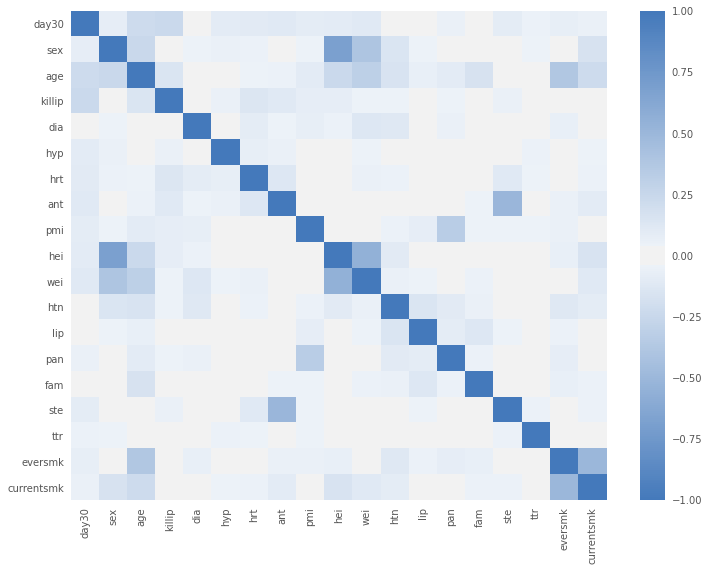

In [7]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(250, 250, n=256))
''

### $\chi^2$ test

In [8]:
contingency = pd.crosstab(df.day30, df["dia"])
contingency.shape==(2,2)

True

In [21]:
from scipy.stats import chi2_contingency


# commento 1: "test chi² su tabella di contingenza per valori discreti"

for var in ['sex', 'killip', 'dia', 'hyp', 'hrt', 'ant', 'pmi',
         'htn', 'lip', 'pan', 'fam', 'ttr', 'eversmk',
       'currentsmk']:
    contingency = pd.crosstab(df[var],df.day30)
    print(contingency)
    chi2, p, dof, ex = chi2_contingency(contingency, correction=False) # <-  Yates's correction, not used.
    print("\nChi² ={:10.3}".format(chi2))
    print("p    ={:10.2}".format(p))
    print("degrees of freedom = {}".format(dof))

    if contingency.shape==(2,2):
        contingency=contingency[contingency.columns[::-1]][::-1]
        table = sm.stats.Table2x2(contingency)
        print(table)
        print(table.summary(method='normal'))
    
    print("\n")
    print("-"*49,"\n")

# commento 1: "test sulle medie per variabili continue"

for var in ['age','wei','hei','ste']:
    from scipy.stats import ttest_ind

    cat1 = df[df['day30']==0]
    cat2 = df[df['day30']==1]

    print(var)
    statistic, pvalue = ttest_ind(cat1[var], cat2[var],equal_var=False)
    print("Welch's t-test statistic = {:5.4}".format(statistic) )
    print("p-value = {:5.4}".format(pvalue))
    print("\n")
    print("-"*49,"\n")
    

day30     0    1
sex             
0      2581  140
1       849   91

Chi² =      24.3
p    =   8.2e-07
degrees of freedom = 1
A 2x2 contingency table with counts:
[[  91.  849.]
 [ 140. 2581.]]
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.976       1.501 2.602   0.000
Log odds ratio    0.681 0.140 0.406 0.956   0.000
Risk ratio        1.882       1.461 2.424   0.000
Log risk ratio    0.632 0.129 0.379 0.885   0.000
-------------------------------------------------


------------------------------------------------- 

day30      0    1
killip           
1       3022  144
2        376   57
3         24   19
4          8   11

Chi² =  2.41e+02
p    =   6.1e-52
degrees of freedom = 3


------------------------------------------------- 

day30     0    1
dia             
0      2990  190
1       440   41

Chi² =      4.59
p    =     0.032
degrees of freedom = 1
A 2x2 contingency table with counts:
[[  41.  440.]
 [ 1

## Question 2

*Perform univariable logistic regression analyses, of all candidate predictors for your model. Optional:For Age is the linearity effect reasonable? How could you model alternatively the age effect?



# Univariate logistic regressions

*Perform univariable logistic regression analyses, of all candidate predictors for your model. Optional:For Age is the linearity effect reasonable?How could you model alternativelythe age effect?*

In [11]:

for col in ['age', 'hei', 'wei','sex', 'killip', 'dia', 'hyp', 'hrt', 'ant', 'pmi',
        'htn', 'lip', 'pan', 'fam', 'ste', 'ttr', 'eversmk',
       'currentsmk']:
    
        
    
    print("=================================","  " ,str(col), "  ","==================================","\n")
    y, X = dmatrices( 'day30 ~ {}'.format(col), data=df, return_type='dataframe')
    mod = sm.Logit(y, X)
    res = mod.fit()

    print (res.summary())
    print("\nOdds Ratio = {:3.5}".format(np.exp(res.params[1])))
    print("==============================================================================","\n"*4)

=================================    age    ================================== 

Optimization terminated successfully.
         Current function value: 0.207623
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  day30   No. Observations:                 3661
Model:                          Logit   Df Residuals:                     3659
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.1180
Time:                        13:23:31   Log-Likelihood:                -760.11
converged:                       True   LL-Null:                       -861.82
Covariance Type:            nonrobust   LLR p-value:                 3.728e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8980      

Optimization terminated successfully.
         Current function value: 0.235065
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  day30   No. Observations:                 3661
Model:                          Logit   Df Residuals:                     3659
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                0.001451
Time:                        13:23:31   Log-Likelihood:                -860.57
converged:                       True   LL-Null:                       -861.82
Covariance Type:            nonrobust   LLR p-value:                    0.1138
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7891      0.091    -30.627      0.000      -2.968      -2.611
htn            0.2174      0.

Optimization terminated successfully.
         Current function value: 0.207623
         Iterations 8


Text(0, 0.5, 'generalized residuals on logit')

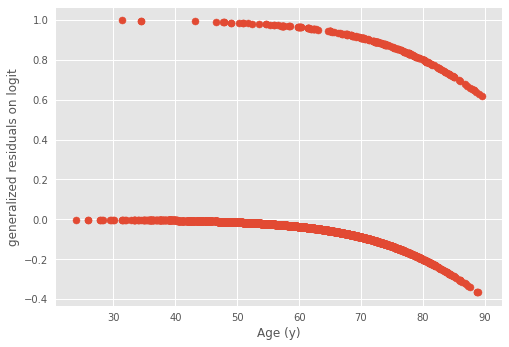

In [12]:
#linearity effect of Age variable


y, X = dmatrices( 'day30 ~ {}'.format("age"), data=df, return_type='dataframe')    
mod = sm.Logit(y, X)
res = mod.fit()

r = res.resid_generalized.reset_index()
plt.scatter(df['age'], r.iloc[:,1])
plt.xlabel("Age (y)")
plt.ylabel("generalized residuals on logit")

## Question 3

*Build  a multivariable  logistic  regression model  starting from the list of significant predictors at univariable analyses. Pay attention to multicollinearity (same variables recoded in different ways).* 


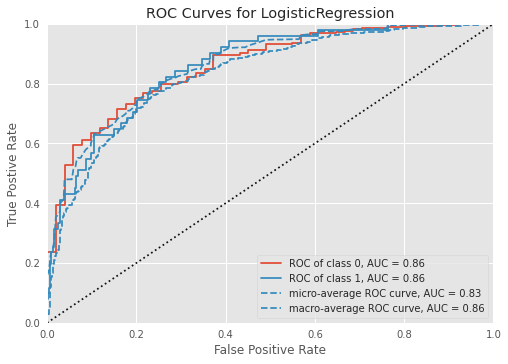

coefficients =
[('sex', -0.26981609832570075),
 ('age', 0.07186143798412531),
 ('killip', 0.6920604068124521),
 ('dia', 0.03546600623884368),
 ('hyp', 0.9644185992404019),
 ('hrt', 0.6848921367509632),
 ('ant', 0.6428106092211716),
 ('pmi', 0.610496815838676),
 ('hei', -0.03321671750981742),
 ('wei', -0.008872924809368472),
 ('htn', 0.11025820956360047),
 ('lip', -0.1724030759986628),
 ('pan', 0.12725190291292462),
 ('fam', -0.07303444861176148),
 ('ste', 0.04397996298586119),
 ('ttr', 0.4105951615623739),
 ('eversmk', -0.10758058781108373),
 ('currentsmk', 0.10531704192528091)]
'intercept: [-0.41132627]'


In [13]:
# full model

x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]], df['day30'])
weight = 15
fullModel = LogisticRegression(solver='lbfgs', class_weight={0:1,1:weight}, penalty='none')
fullModel.fit(x_train, y_train)
rocauc = ROCAUC(fullModel)
rocauc.score(x_test, y_test)  
r = rocauc.poof()

print("coefficients =")
pprint(list(zip(df.columns[1:],fullModel.coef_.tolist()[0])))
pprint("intercept: {}".format(fullModel.intercept_))


#### micro/macro averages in ROC curves:

Micro/macro averages are just features of the library that I use for plotting ROC curves. They are useful only for multiclass settings. When you have a multiclass setting, the average parameter in the score function needs to be one of these:

    'weighted'
    'micro'
    'macro'

The first one, `weighted` calculates the score for each class independently but when it adds them together uses a weight that depends on the number of true labels of each class:

$weighted = score_{class1}∗W_1 + score_{class2}∗W_2+⋅⋅⋅+score_{classN}∗W_N$

therefore favouring the majority class. `micro` uses the global number of TP, FN, FP and calculates the score directly:

$micro = score_{class1+class2+class3}$

no favouring any class in particular. Finally, `macro` calculates the score separated by class but not using weights for the aggregation:

$macro = \left( score_{class1}+score_{class2}+⋅⋅⋅+score_{classN} \right) / N $

which resuls in a bigger penalisation when your model does not perform well with the minority classes. The latter is usualy chosen when considering unbalanced classes.

Other formulations:

$micro = \frac{TP_1+TP_2+\dots+TP_k}{(TP_1+TP_2+\dots+TP_k)+(FP_1+FP_2+\dots+FP_k)}$

$with\ PRE_n=\frac{TP_n}{TP_n+PF_n} , macro = \frac{PRE_1+\dots+PRE_k}{k}$

In [14]:
"""# pruned model

selectedCovar=['sex','killip','hyp','ant','pmi']


x_train, x_test, y_train, y_test = train_test_split(df[selectedCovar], df['day30'])
weight = 15
fullModel = LogisticRegression(solver='lbfgs', class_weight={0:1,1:weight})
fullModel.fit(x_train, y_train)
rocauc = ROCAUC(fullModel)
rocauc.score(x_test, y_test)  
r = rocauc.poof()

print("coefficients =")
pprint(list(zip(selectedCovar,fullModel.coef_.tolist()[0])))
pprint("intercept: {}".format(fullModel.intercept_))"""


'# pruned model\n\nselectedCovar=[\'sex\',\'killip\',\'hyp\',\'ant\',\'pmi\']\n\n\nx_train, x_test, y_train, y_test = train_test_split(df[selectedCovar], df[\'day30\'])\nweight = 15\nfullModel = LogisticRegression(solver=\'lbfgs\', class_weight={0:1,1:weight})\nfullModel.fit(x_train, y_train)\nrocauc = ROCAUC(fullModel)\nrocauc.score(x_test, y_test)  \nr = rocauc.poof()\n\nprint("coefficients =")\npprint(list(zip(selectedCovar,fullModel.coef_.tolist()[0])))\npprint("intercept: {}".format(fullModel.intercept_))'

# Feature selection

In [15]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline


To perform best selection, we fit separate models for each possible combination of the n

predictors and then select the best subset. That is we fit:

* All models that contains exactly one predictor
* All models that contain 2 predictors at the second step: $\binom{n}{2}$
* Until reaching the end point where all $n$ predictors are included in the model


#### Algorithm

* Let $M_0$ denote the null model which contains no predictors, this model simply predicts the sample mean of each observation

    * For $k=1,2,...,n$

    * Fit all $\binom{n}{k}$ models that contain exactly $k$ predictors
    
    * Pick the best among these $\binom{n}{k}$ models, and call it $M_k$. Here the best is defined as having the smallest RSS, or an equivalent measure

    * Select the single best model among "$M_0,M_1,...,M_n$ using cross validated predicton error, $C_p$, $BIC$, $adjusted R^2$ or any other method.
    
    
#### Performance issues:

This algorithm, being $O(\binom n k) $ is simply too huge to compute on any reasonable machine, for more than 5-6 parameters out of 18. It has been run for 1-7 features for demonstrative purposes: run time: ~8h.

In [16]:
# helper: logistic model fitter

def calculate_bic(n, mse, num_params):
	bic = n * np.log(mse) + num_params * np.log(n)
	return bic

def fit_log_reg(Xn,Yn):
    #Fit linear regression model and return RSS and R squared values
    model_k = LogisticRegression(fit_intercept = True, penalty='none')  # no penalty, or implicit L2
    model_k.fit(Xn,Yn)
    MSE = mean_squared_error(Yn,model_k.predict(Xn))
    RSS = MSE * len(Yn)
    R_squared = model_k.score(Xn,Yn)
    num_params = len(model_k.coef_) + 1
    BIC = calculate_bic(len(Yn), MSE, num_params)
    #print(num_params, RSS, BIC, R_squared)
    return RSS, R_squared, BIC



In [17]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook


In [18]:
#Initialization variables
Y = df.day30
X = df.drop(columns = 'day30', axis = 1)
k = 18
RSS_list, R_squared_list, BIC_list, feature_list = [],[], [], []
numb_features = []

In [19]:
%%time

# looping over all possible combinations
import itertools
from sklearn.metrics import mean_squared_error

####################

maxfeatures = 6  # warning : don't go > 5

####################

#Looping over k = 1 to k = maxfeatures features in X
for k in tnrange(1,maxfeatures+1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_log_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        BIC_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
res = pd.DataFrame({'numb_features': numb_features,
                   'RSS': RSS_list, 
                   'R_squared':R_squared_list,
                   'BIC':BIC_list,
                   'features':feature_list})


CPU times: user 1h 24min 13s, sys: 3h 46min, total: 5h 10min 13s
Wall time: 21min 22s


In [20]:
#get best models
res_min = res[res.groupby('numb_features')['BIC'].transform(min) == res['BIC']]
res_max = res[res.groupby('numb_features')['R_squared'].transform(max) ==res['R_squared']]

In [21]:
res[res['BIC']== min(res['BIC'])]

,numb_features,RSS,R_squared,BIC,features
19239,6,212.0,0.942092,-10413.431461,"(age, killip, hyp, ant, pmi, ste)"


In [22]:
res[res['R_squared']== max(res['R_squared'])]

,numb_features,RSS,R_squared,BIC,features
19239,6,212.0,0.942092,-10413.431461,"(age, killip, hyp, ant, pmi, ste)"


In [23]:
res['min_BIC'] = res.groupby('numb_features')['BIC'].transform(min)
res['max_R_squared'] = res.groupby('numb_features')['R_squared'].transform(max)
res

,numb_features,RSS,R_squared,BIC,features,min_BIC,max_R_squared
0,1,231.0,0.936902,-10099.202574,"(sex,)",-10147.059465,0.937722
1,1,231.0,0.936902,-10099.202574,"(age,)",-10147.059465,0.937722
2,1,228.0,0.937722,-10147.059465,"(killip,)",-10147.059465,0.937722
3,1,231.0,0.936902,-10099.202574,"(dia,)",-10147.059465,0.937722
4,1,231.0,0.936902,-10099.202574,"(hyp,)",-10147.059465,0.937722
...,...,...,...,...,...,...,...
31174,6,231.0,0.936902,-10099.202574,"(lip, pan, fam, ste, eversmk, currentsmk)",-10413.431461,0.942092
31175,6,231.0,0.936902,-10099.202574,"(lip, pan, fam, ttr, eversmk, currentsmk)",-10413.431461,0.942092
31176,6,231.0,0.936902,-10099.202574,"(lip, pan, ste, ttr, eversmk, currentsmk)",-10413.431461,0.942092
31177,6,231.0,0.936902,-10099.202574,"(lip, fam, ste, ttr, eversmk, currentsmk)",-10413.431461,0.942092


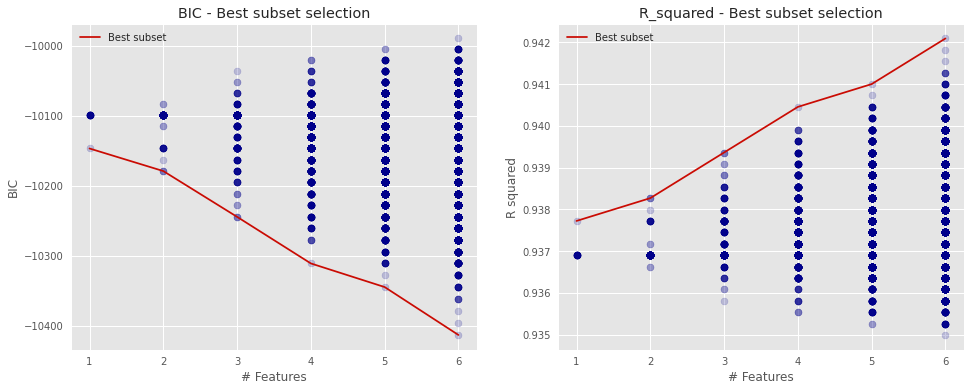

In [24]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(res.numb_features,res.BIC, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('BIC')
ax.set_title('BIC - Best subset selection')
ax.plot(res.numb_features,res.min_BIC,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(res.numb_features,res.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(res.numb_features,res.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()


In [25]:
len(res)

31179

After so many trial, a bruteforce algorithm selected (age, killip, hyp, hrt, ttr) as the 5 best covariates. Looking at the last plot, tho, this is far from the elbow of the Pareto front.

Not being able to compute it by bruteforce, we'll resort to other solutions.

### Feature ranking with recursive feature elimination.

Due to the poor performance and limitation of a bruteforce approach, we'll resort to Recursive Feature Elimination, Cross-Validated (RFECV) feature selection.

This algorithm selects the best subset of features for the supplied estimator by removing 0 to N features (where N is the number of features) using recursive feature elimination, then selecting the best subset based on the cross-validation score of the model. Recursive feature elimination eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features, determined by either the coef_ or feature_importances_ attribute of the fitted model.

The visualization plots the score relative to each subset and shows trends in feature elimination. If the feature elimination CV score is flat, then potentially there are not enough features in the model. An ideal curve is when the score jumps from low to high as the number of features removed increases, then slowly decreases again from the optimal number of features.

RFE does not use BIC as feature elimination criterion, instead it uses model ROC-AUC.

In [26]:
# Feature Extraction with Recurrent Feature Extraction

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression(solver='lbfgs', penalty='none')
rfe = RFE(model,n_features_to_select=1, step=1)  
fit = rfe.fit(x_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 1
Selected Features: [False False  True False False False False False False False False False
 False False False False False False]
Feature Ranking: [ 5 11  1 15  2  7  3  4 14 18 12 17  9 13 10  8  6 16]


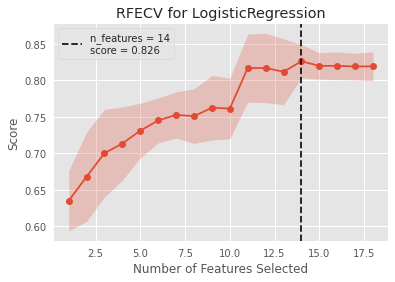

In [27]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import rfecv

cv = StratifiedKFold(5)
visualizer = rfecv(LogisticRegression(), X=df.drop('day30',axis=1), y=df.day30, cv=cv, scoring='roc_auc', penalty='none')

In [28]:
res = pd.DataFrame(list(zip(df.columns[1:], visualizer.support_ )))
res.rename(columns={0:'var',1:'included'},inplace=True)
list(res[res['included']]['var'])

['sex',
 'age',
 'killip',
 'dia',
 'hyp',
 'hrt',
 'ant',
 'pmi',
 'hei',
 'htn',
 'pan',
 'ste',
 'ttr',
 'eversmk']

## Question 4 

*Evaluate model performance in discrimination by means of the AUC under the ROC curve. Evaluate also model performance in terms of calibration.* 

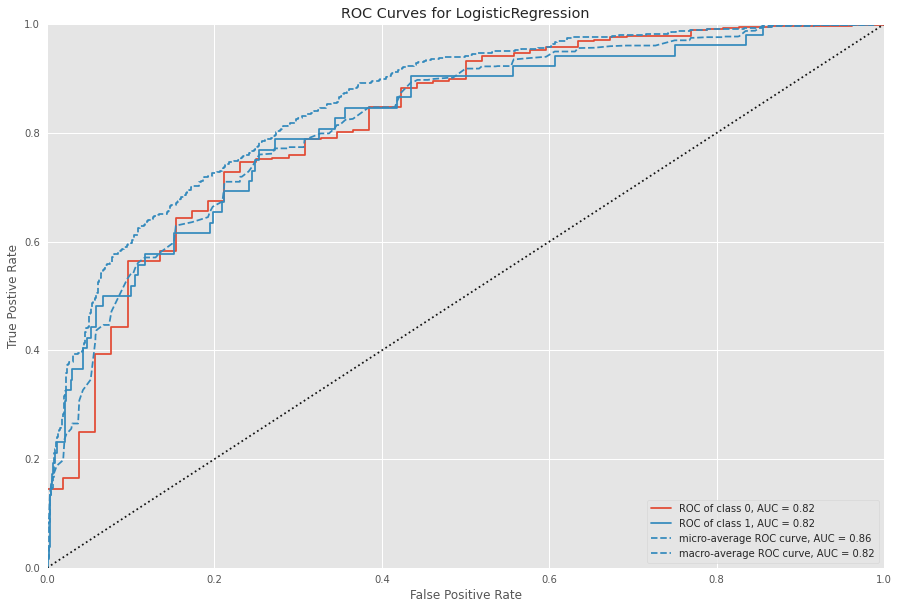

In [29]:

selectedCovar=['sex', 'age', 'killip', 'dia', 'hyp', 'hrt', 'ant', 'pmi', 'wei', 'lip', 'fam', 'ste', 'ttr','eversmk']

x_train, x_test, y_train, y_test = train_test_split(df[selectedCovar], df['day30'])

weight = 15

prunedModel = LogisticRegression(solver='lbfgs', class_weight={0:1,1:weight}, penalty='l2')

prunedModel.fit(x_train, y_train)

rocauc = ROCAUC(prunedModel, size=(1080, 720))

rocauc.score(x_test, y_test)  
r = rocauc.poof()

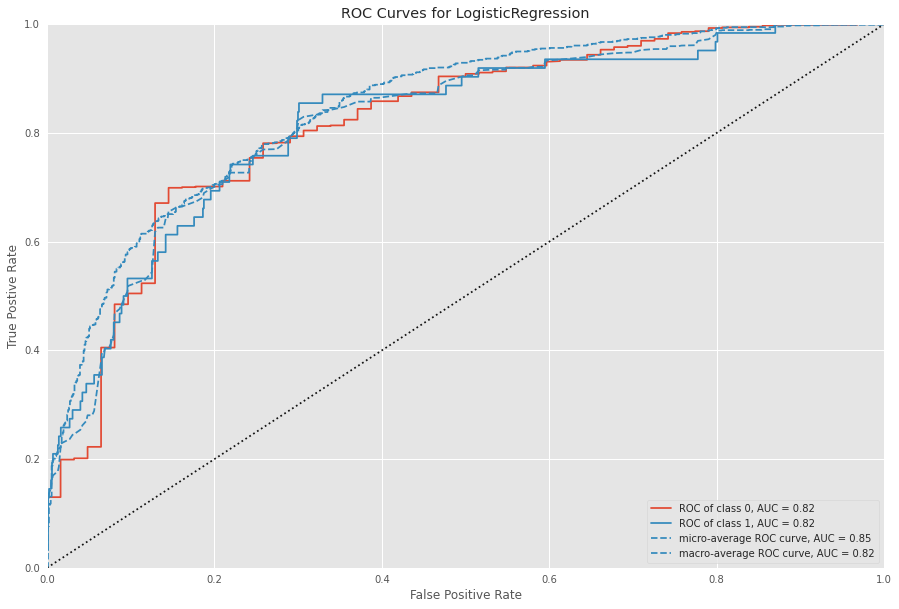

In [22]:
selectedCovar=[ 'age', 'killip', 'hyp', 'hrt', 'ant', 'pmi', 'ste', 'ttr']

x_train, x_test, y_train, y_test = train_test_split(df[selectedCovar], df['day30'])

weight = 15

prunedModel = LogisticRegression(solver='lbfgs', class_weight={0:1,1:weight}, penalty='l2')

prunedModel.fit(x_train, y_train)

rocauc = ROCAUC(prunedModel, size=(1080, 720))

rocauc.score(x_test, y_test)  
r = rocauc.poof()

5) Represent the estimated model by means of a nomogram (hint: R function nomogram {rms})

Niente nomogrammi su python, però ho fatto un widget interattivo.

In [34]:
# age, killip, hyp, hrt, ttr
# pruned model

selectedCovar=['age', 'killip', 'hyp', 'hrt', 'ant', 'pmi', 'ste', 'ttr']
x_train, x_test, y_train, y_test = train_test_split(df[selectedCovar], df['day30'])
weight = 15
prunedModel = LogisticRegression(solver='lbfgs', class_weight={0:1,1:weight}, penalty='none')
prunedModel.fit(x_train, y_train)


font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)


print("\n\n        ☠☠☠☠  Death Calculator  ☠☠☠☠ ")

# 'sex','killip','hyp','ant','pmi'

@interact(age=(0,140,1),   # age
          killipClass=(1,4,1),  # killip
          hypotension=False, # hyp
          heartRateOver80BPM=False, # hrt
          anteriorInfarct=False, #ant
          previousMyocardInfarction=False, #pmi
          ECGLeads=(0,14,1), #ste
          timeToReliefMoreThan1h=False, # ttr
         ) 

def pred( age=0,   # sex
          killipClass=1,  # killip
          hypotension=False, # hyp
          heartRateOver80BPM=False, # hrt      
          anteriorInfarct=False, #ant
          previousMyocardInfarction=False, #pmi
          ECGLeads=1, #ste
          timeToReliefMoreThan1h=False, # ttr
        ):
    
    covariates = np.array([age,   # sex
          killipClass,  # killip
          hypotension, # hyp
          heartRateOver80BPM, # hrt
          anteriorInfarct, #ant
          previousMyocardInfarction, #pmi
          ECGLeads, #ste
          timeToReliefMoreThan1h, # ttr
                          ])
    
    prediction = prunedModel.predict([covariates.astype(int)]), 
    prob =       prunedModel.predict_proba([covariates.astype(int)])

  
    #print("covariates:", covariates)
    print("p(p30)= {:.3}%".format(prob[0][1]*100))
    return





        ☠☠☠☠  Death Calculator  ☠☠☠☠ 


interactive(children=(IntSlider(value=0, description='age', max=140), IntSlider(value=1, description='killipCl…

## Question 6

6) Internally validate the estimated model (hint: R function  validate {rms})



In [31]:
selectedCovar=['sex', 'age', 'killip', 'dia', 'hyp', 'hrt', 'ant', 'pmi', 'wei', 'lip', 'fam', 'ste', 'ttr','eversmk']

X = df[selectedCovar]
y = df[['day30']]

In [32]:
@interact(metric = metrics.SCORERS.keys())

def test(metric):
    clf = LogisticRegressionCV(cv=7, random_state=0, scoring = metric).fit(X, y)
    print("metric: {}, score = {:.4}".format(metric,clf.score(X, y)))

interactive(children=(Dropdown(description='metric', options=('explained_variance', 'r2', 'max_error', 'neg_me…

## Question 7

*Setting  aside  the  interpretability  of  the  model, are  you  able  to  find  a  machine learning algorithm that predicts the risk of event with a similar (or better) performance than the logistic model*

We opted for an XGBoost used to model a logistic regressor, and a K-neighbors classifier.

# XGBoost

## Confidence interval for ML models

Since there are no functions that computes CI for general ML models, and the single implementation of De Long methods is said to give results different from R implementation, I'd resolve to a bootstrap computation.

Original ROC area: 0.800
mean=0.7994364680545585, lowerCI=0.788595179945627, higherCI=0.81027775616349


''

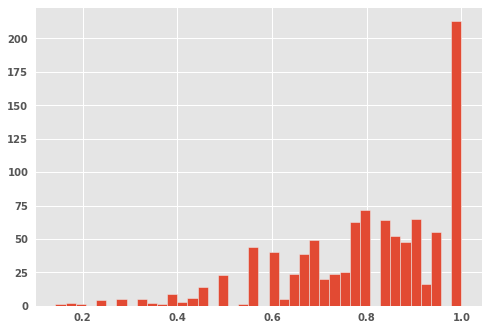

In [70]:
# general example:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score
import scipy 

y_pred = np.array([0.21, 0.32, 0.63, 0.35, 0.92, 0.79, 0.82, 0.99, 0.04])
y_true = np.array([0,    1,    0,    0,    1,    1,    0,    1,    0   ])

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))
def ROC_AUC_CI(y_pred, y_true):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    return bootstrapped_scores, mean_confidence_interval(bootstrapped_scores)

res = ROC_AUC_CI(y_pred, y_true)
plt.hist(res[0], bins=40)
print("mean={}, lowerCI={}, higherCI={}".format(res[1][0], res[1][1],res[1][2]))
''

In [33]:
df = pd.read_csv("./Gusto.csv")
df['eversmk']= (df['smk']!=1).astype(bool)
df['currentsmk']=(df['smk']==3).astype(bool)
# dummify smk categories
for var in ['day30','sho','dia','hyp','hrt','ant','pmi','htn','lip','pan','fam','ttr']:
    df[var]=df[var].astype(bool)
    
df['killip']=df['killip'].astype(int)

df['sexMale']=df['sex'].apply(lambda x: False if x==0 else True)
    
df.drop(['sex',"smk",'a65','st4'], axis=1, inplace=True)
df

,day30,age,killip,sho,dia,hyp,hrt,ant,pmi,hei,wei,htn,lip,pan,fam,ste,ttr,eversmk,currentsmk,sexMale
0,False,70.313,1,False,False,False,False,True,False,177.3,84.0,True,True,False,False,1,True,True,True,False
1,False,59.844,1,False,True,False,False,True,False,172.0,115.0,True,False,False,True,6,False,False,False,False
2,False,59.023,1,False,False,False,True,False,False,170.0,76.0,True,False,False,True,3,False,False,False,False
3,True,80.375,1,False,False,False,True,False,False,154.9,50.0,False,False,False,False,3,False,True,True,True
4,False,64.750,1,False,False,True,False,False,False,167.0,97.4,False,False,True,True,2,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,False,51.836,1,False,False,False,False,True,False,169.8,65.0,False,False,False,False,7,True,False,False,False
3657,False,51.836,1,False,True,False,False,True,False,167.6,72.1,False,False,True,False,7,True,True,True,False
3658,False,63.977,1,False,False,False,False,False,False,174.2,87.2,True,False,False,False,2,True,True,False,False
3659,False,59.758,1,False,False,False,False,False,False,165.0,57.8,False,False,False,False,6,True,True,True,True


In [46]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]], df['day30'])

xg_train = xgb.DMatrix(x_train, label=y_train)

n_folds = 5
early_stopping = 10

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

params = {'eta': [0.03], 
          'max_depth': [2,5,8], 
          'n_estimators' :range(60,220,40),
          'objective': ['binary:logistic'],
          'seed': [99], 
          'silent': [1], 
          'eval_metric':['auc','f1_score'],
          'scale_pos_weight':[1,7,15,100,200,2000]}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   23.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 797 tasks      | elapsed:  4.8min


[11:38:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=10)]: Done 1440 out of 1440 | elapsed:  4.8min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...
                                     scale_pos_weight=None, seed=42,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=10,
             param_grid={'eta': [0.03],

best metrics: 



In [47]:
grid_search.best_estimator_.scale_pos_weight

#apparently, XGBoost performs better without class weighting...

1

In [72]:
for x in [x_train, x_test, y_train, y_test]:
    print (x.shape)

clf=grid_search.best_estimator_
clf.scale_pos_weight=15

xgb_param = clf.get_xgb_params()

clf.fit(x_train, y_train)

(2745, 18)
(916, 18)
(2745,)
(916,)
[11:49:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.03,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0299999993,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=99, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=15, seed=99, silent=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

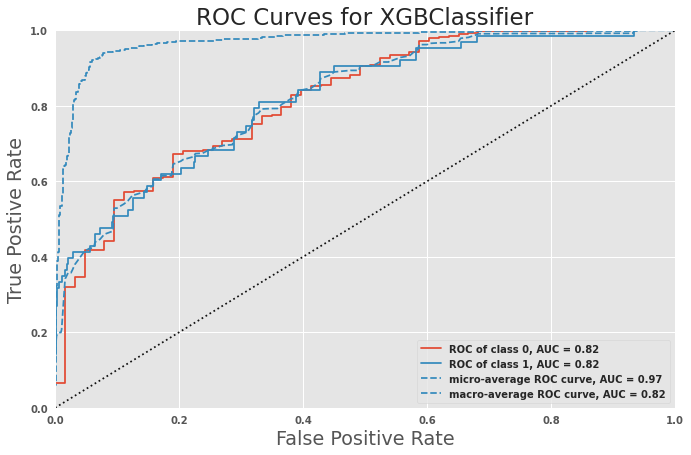

In [49]:
from yellowbrick.classifier import ROCAUC


plots = []
for index,pl in enumerate([ROCAUC]):
    ax = plt.subplot()
    g = pl(clf, size=(800, 500))
    g.fit(x_train,y_train)
    g.score(x_test,y_test)  
    ax = g.poof(size=(1080,720), silent=True)

mean=0.818656144492438, lowerCI=0.8169345091001741, higherCI=0.8203777798847018


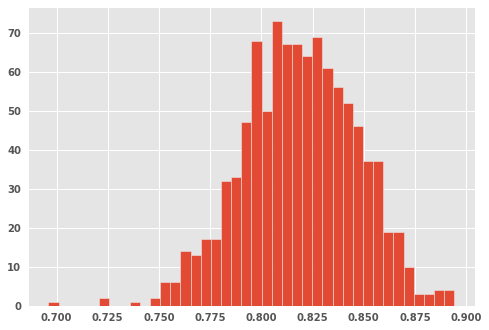

In [80]:
y_pred = clf.predict_proba(x_test)[:,1]
res=ROC_AUC_CI(y_pred, np.array(y_test))
plt.hist(res[0], bins=40)
print("mean={}, lowerCI={}, higherCI={}".format(res[1][0], res[1][1],res[1][2]))

# K-N classifier

hyperparameters were optimized by genetic programming gridsearch on a separeted code, but they are very robust.

In [81]:
df = pd.read_csv("./Gusto.csv")
df['eversmk']= (df['smk']!=1).astype(bool)
df['currentsmk']=(df['smk']==3).astype(bool)
# dummify smk categories
for var in ['day30','sho','dia','hyp','hrt','ant','pmi','htn','lip','pan','fam','ttr']:
    df[var]=df[var].astype(bool)
    
df['killip']=df['killip'].astype(int)

df['sexMale']=df['sex'].apply(lambda x: False if x==0 else True)
    
df.drop(['sex',"smk",'a65','st4'], axis=1, inplace=True)
df

,day30,age,killip,sho,dia,hyp,hrt,ant,pmi,hei,wei,htn,lip,pan,fam,ste,ttr,eversmk,currentsmk,sexMale
0,False,70.313,1,False,False,False,False,True,False,177.3,84.0,True,True,False,False,1,True,True,True,False
1,False,59.844,1,False,True,False,False,True,False,172.0,115.0,True,False,False,True,6,False,False,False,False
2,False,59.023,1,False,False,False,True,False,False,170.0,76.0,True,False,False,True,3,False,False,False,False
3,True,80.375,1,False,False,False,True,False,False,154.9,50.0,False,False,False,False,3,False,True,True,True
4,False,64.750,1,False,False,True,False,False,False,167.0,97.4,False,False,True,True,2,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,False,51.836,1,False,False,False,False,True,False,169.8,65.0,False,False,False,False,7,True,False,False,False
3657,False,51.836,1,False,True,False,False,True,False,167.6,72.1,False,False,True,False,7,True,True,True,False
3658,False,63.977,1,False,False,False,False,False,False,174.2,87.2,True,False,False,False,2,True,True,False,False
3659,False,59.758,1,False,False,False,False,False,False,165.0,57.8,False,False,False,False,6,True,True,True,True


In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tpot.export_utils import set_param_recursive

tpot_data = df[['day30','sho','dia','hyp','hrt','ant','pmi','htn','lip','pan','fam','ttr']]

#features = tpot_data.drop('day30', axis=1)
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]], df['day30'])

exported_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=50, p=2, weights="distance")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(x_train, y_train)
results = exported_pipeline.predict(x_test)

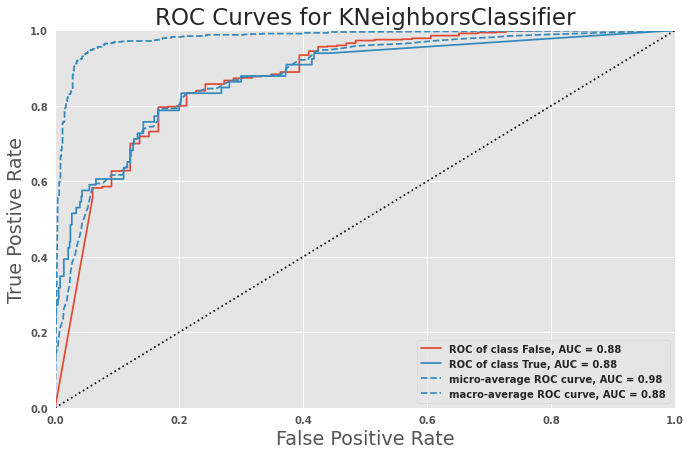

In [98]:
from yellowbrick.classifier import ROCAUC

plots = []
for index,pl in enumerate([ROCAUC]):
    ax = plt.subplot()
    g = pl(exported_pipeline, size=(800, 500))
    g.fit(x_train, y_train)
    g.score(x_test,y_test)  
    ax = g.poof(size=(1080,720))

mean=0.8785419850448369, lowerCI=0.8771001807182636, higherCI=0.8799837893714103


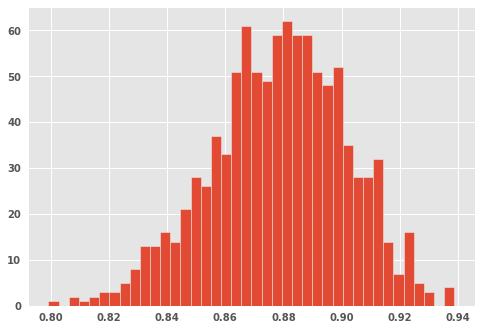

In [102]:
y_pred = exported_pipeline.predict_proba(x_test)[:,1]
res=ROC_AUC_CI(y_pred, np.array(y_test))
plt.hist(res[0], bins=40)
print("mean={}, lowerCI={}, higherCI={}".format(res[1][0], res[1][1],res[1][2]))

*8) Machine learning: mi spieghi meglio, quali variabili hai "dato in pasto" a xgboost? qui poi ti farò io delle domande, ma solo x capire meglio...anche il discorso della figura (mostra la ROC sia su training che su test?)*

Ad XGBoost ho dato indiscriminatamente in pasto tutte le variabili (meno le labels ovviamente). La ROC è calcolata solo sul test set. `g.score(x_test,y_test)`

# A simple ANN


In [103]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [104]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
df = pd.read_csv("./Gusto.csv")

# dummify smk categories
df['eversmk']= (df['smk']!=1).astype(int)
df['currentsmk']=(df['smk']==3).astype(int)
df.drop(["smk"], axis=1, inplace=True)

normalized_df=(df-df.min())/(df.max()-df.min())

#for var in ['hei','wei','age', 'ste']:

 #   df[var]=(df[var]-df[var].mean())/df[var].std()

normalized_df

,day30,sex,age,a65,killip,sho,dia,hyp,hrt,ant,...,wei,htn,lip,pan,fam,ste,st4,ttr,eversmk,currentsmk
0,0.0,0.0,0.707643,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.333333,1.0,1.0,0.0,0.0,0.090909,0.0,1.0,1.0,1.0
1,0.0,0.0,0.547992,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.548611,1.0,0.0,0.0,1.0,0.545455,1.0,0.0,0.0,0.0
2,0.0,0.0,0.535471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.277778,1.0,0.0,0.0,1.0,0.272727,0.0,0.0,0.0,0.0
3,1.0,1.0,0.861088,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.097222,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,1.0,1.0
4,0.0,0.0,0.622808,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.426389,0.0,0.0,1.0,1.0,0.181818,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,0.0,0.0,0.425870,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.201389,0.0,0.0,0.0,0.0,0.636364,1.0,1.0,0.0,0.0
3657,0.0,0.0,0.425870,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.250694,0.0,0.0,1.0,0.0,0.636364,1.0,1.0,1.0,1.0
3658,0.0,0.0,0.611020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.355556,1.0,0.0,0.0,0.0,0.181818,0.0,1.0,1.0,0.0
3659,0.0,1.0,0.546680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.151389,0.0,0.0,0.0,0.0,0.545455,1.0,1.0,1.0,1.0


In [106]:
data = np.array(normalized_df)

In [107]:
X = data[:,1:]
y = data[:,0]

scaler = StandardScaler().fit(X)


#split in train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
# define the keras model
model = Sequential()
model.add(Dense(250,  activation='sigmoid',kernel_initializer="glorot_uniform",)) # input_dim=X_train.shape[1],
model.add(Dense(300, activation='sigmoid', kernel_initializer="glorot_uniform",))
model.add(Dense(300, activation='sigmoid', kernel_initializer="glorot_uniform",))
model.add(Dense(1, activation='sigmoid'))

In [109]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])


In [110]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.20, class_weight={0:1.,1:15.})

Epoch 1/150

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
220/220 [==============================] - 0s 2ms/step - loss: 1.2930 - auc: 0.6248 - accuracy: 0.6043 - val_loss: 0.7718 - val_auc: 0.7741 - val_accuracy: 0.5337
Epoch 2/150
220/220 [==============================] - 0s 915us/step - loss: 0.9712 - auc: 0.8274 - accuracy: 0.7441 - val_loss: 0.9446 - val_auc: 0.7761 - val_accuracy: 0.4262
Epoch 3/150
220/220 [==============================] - 0s 925us/step - loss

220/220 [==============================] - 0s 934us/step - loss: 0.8208 - auc: 0.8665 - accuracy: 0.8092 - val_loss: 0.8465 - val_auc: 0.7621 - val_accuracy: 0.4827
Epoch 42/150
220/220 [==============================] - 0s 924us/step - loss: 0.8106 - auc: 0.8651 - accuracy: 0.8388 - val_loss: 0.5113 - val_auc: 0.7544 - val_accuracy: 0.8470
Epoch 43/150
220/220 [==============================] - 0s 919us/step - loss: 0.7979 - auc: 0.8679 - accuracy: 0.8374 - val_loss: 0.4591 - val_auc: 0.7555 - val_accuracy: 0.8452
Epoch 44/150
220/220 [==============================] - 0s 917us/step - loss: 0.8052 - auc: 0.8708 - accuracy: 0.8242 - val_loss: 0.4953 - val_auc: 0.7577 - val_accuracy: 0.8415
Epoch 45/150
220/220 [==============================] - 0s 913us/step - loss: 0.7872 - auc: 0.8728 - accuracy: 0.8552 - val_loss: 0.4403 - val_auc: 0.7427 - val_accuracy: 0.8743
Epoch 46/150
220/220 [==============================] - 0s 924us/step - loss: 0.7898 - auc: 0.8690 - accuracy: 0.8479 - val

220/220 [==============================] - 0s 927us/step - loss: 0.4095 - auc: 0.9690 - accuracy: 0.8866 - val_loss: 0.4896 - val_auc: 0.6553 - val_accuracy: 0.8634
Epoch 88/150
220/220 [==============================] - 0s 940us/step - loss: 0.3978 - auc: 0.9701 - accuracy: 0.8907 - val_loss: 0.5542 - val_auc: 0.6327 - val_accuracy: 0.8179
Epoch 89/150
220/220 [==============================] - 0s 941us/step - loss: 0.3979 - auc: 0.9700 - accuracy: 0.8880 - val_loss: 0.5985 - val_auc: 0.6304 - val_accuracy: 0.8197
Epoch 90/150
220/220 [==============================] - 0s 918us/step - loss: 0.3697 - auc: 0.9752 - accuracy: 0.9003 - val_loss: 0.6713 - val_auc: 0.6333 - val_accuracy: 0.7705
Epoch 91/150
220/220 [==============================] - 0s 922us/step - loss: 0.3491 - auc: 0.9776 - accuracy: 0.8953 - val_loss: 0.5160 - val_auc: 0.6323 - val_accuracy: 0.8652
Epoch 92/150
220/220 [==============================] - 0s 929us/step - loss: 0.3366 - auc: 0.9782 - accuracy: 0.9030 - val

Epoch 133/150
220/220 [==============================] - 0s 953us/step - loss: 0.1358 - auc: 0.9956 - accuracy: 0.9690 - val_loss: 0.9692 - val_auc: 0.5837 - val_accuracy: 0.9126
Epoch 134/150
220/220 [==============================] - 0s 922us/step - loss: 0.1302 - auc: 0.9955 - accuracy: 0.9731 - val_loss: 1.4855 - val_auc: 0.6103 - val_accuracy: 0.8069
Epoch 135/150
220/220 [==============================] - 0s 934us/step - loss: 0.1752 - auc: 0.9927 - accuracy: 0.9617 - val_loss: 1.0175 - val_auc: 0.5924 - val_accuracy: 0.8725
Epoch 136/150
220/220 [==============================] - 0s 932us/step - loss: 0.0768 - auc: 0.9983 - accuracy: 0.9791 - val_loss: 0.9130 - val_auc: 0.6121 - val_accuracy: 0.9144
Epoch 137/150
220/220 [==============================] - 0s 927us/step - loss: 0.0338 - auc: 0.9998 - accuracy: 0.9918 - val_loss: 0.9043 - val_auc: 0.5934 - val_accuracy: 0.9144
Epoch 138/150
220/220 [==============================] - 0s 930us/step - loss: 0.0265 - auc: 0.9999 - acc

29/29 [==============================] - 0s 700us/step - loss: 0.7895 - auc: 0.7269 - accuracy: 0.8766
 AUC:  78.95
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion matrix, without normalization
[[779  83]
 [ 30  24]]


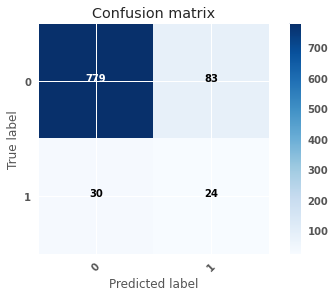

In [49]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
print(' AUC: {:6.4}'.format(accuracy[0]*100))

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=model.predict_classes(X_test))

%matplotlib inline
plot_confusion_matrix(cm, classes=['0','1'])

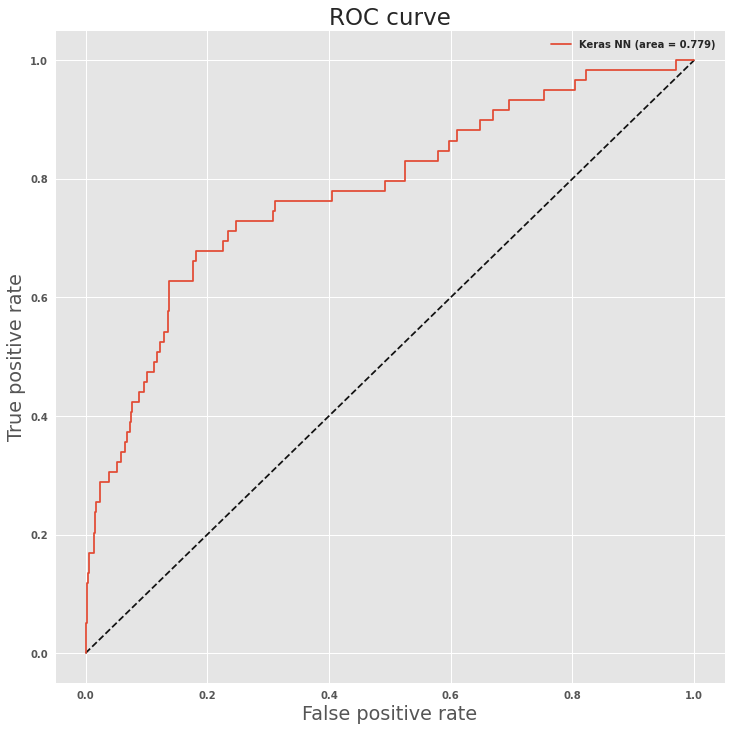

In [111]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1, figsize =(12,12))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras NN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

mean=0.7785910430418573, lowerCI=0.776348386336459, higherCI=0.7808336997472557


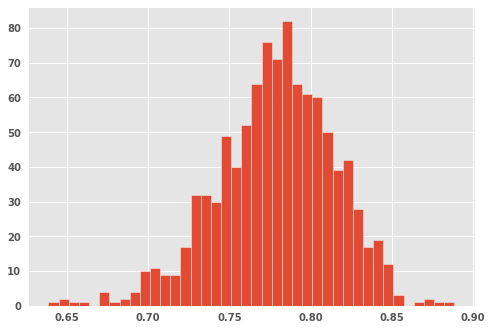

In [115]:
y_pred = model.predict(X_test)
res=ROC_AUC_CI(y_pred, np.array(y_test))
plt.hist(res[0], bins=40)
print("mean={}, lowerCI={}, higherCI={}".format(res[1][0], res[1][1],res[1][2]))

In [51]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def base_model():
    return model
    
my_model = KerasClassifier(build_fn=base_model)    
my_model.fit(X,y)

115/115 [==============================] - 0s 960us/step - loss: 0.4816 - auc: 0.6714 - accuracy: 0.9123


In [52]:
# LIME: https://arxiv.org/pdf/1602.04938.pdf

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = df.columns.tolist()[1:])

86/86 [==============================] - 0s 719us/step - loss: 0.2457 - auc: 0.8667 - accuracy: 0.9468


Weight,Feature
0.0241 ± 0.0039,age
0.0179 ± 0.0039,htn
0.0141 ± 0.0046,hyp
0.0138 ± 0.0017,wei
0.0132 ± 0.0030,ant
0.0124 ± 0.0053,st4
0.0124 ± 0.0018,killip
0.0122 ± 0.0051,ttr
0.0119 ± 0.0011,hrt
0.0117 ± 0.0018,pan


The idea is the following: feature importance can be measured by looking at how much the score (accuracy, F1, R², etc. - any score we’re interested in) decreases when a feature is not available.

To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. Also, it shows what may be important within a dataset, not what is important within a concrete trained model.

To avoid re-training the estimator we can remove a feature only from the test part of the dataset, and compute score without using this feature. It doesn’t work as-is, because estimators expect feature to be present. So instead of removing a feature we can replace it with random noise - feature column is still there, but it no longer contains useful information. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). The simplest way to get such noise is to shuffle values for a feature, i.e. use other examples’ feature values - this is how permutation importance is computed.

The method is most suitable for computing feature importances when a number of columns (features) is not huge; it can be resource-intensive otherwise.